In [1]:
import sys
sys.path.append("../../")

from astronn import datasets
from astronn import models

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Create a dataset with 1Mll theoretical stars oscilations

In [2]:
star_models = datasets.starmodels()
df = star_models.load("/home/roberto/Downloads/dataall_parts/*")

[<tf.Tensor 'DecodeCSV:1625' shape=() dtype=float32>]


#### Print sample vectors from Dataset

In [3]:
for row in df.take(1):
    print(row)

(<tf.Tensor: id=1718, shape=(150, 406, 3), dtype=float32, numpy=
array([[[ 0.    ,  0.    ,  1.    ],
        [ 0.    ,  0.    ,  0.9894],
        [ 0.    ,  0.    ,  0.9088],
        ...,
        [ 0.    ,  0.    ,  0.0542],
        [ 0.    ,  0.    ,  0.051 ],
        [ 0.    ,  0.    ,  0.2282]],

       [[ 0.    ,  0.    ,  1.    ],
        [ 0.    ,  0.    ,  0.9898],
        [ 0.    ,  0.    ,  0.912 ],
        ...,
        [ 0.    ,  0.    ,  0.0078],
        [ 0.    ,  0.    ,  0.0091],
        [ 0.    ,  0.    ,  0.098 ]],

       [[ 0.    ,  0.    ,  0.9999],
        [ 0.    ,  0.    ,  0.99  ],
        [ 0.    ,  0.    ,  0.9136],
        ...,
        [ 0.    ,  0.    , -0.0479],
        [ 0.    ,  0.    , -0.0506],
        [ 0.    ,  0.    ,  0.1377]],

       ...,

       [[ 0.    ,  0.    ,  1.    ],
        [ 0.    ,  0.    ,  0.9894],
        [ 0.    ,  0.    ,  0.9086],
        ...,
        [ 0.    ,  0.    ,  0.07  ],
        [ 0.    ,  0.    ,  0.0773],
        [ 0. 

#### Create a Separable convolution model

In [1]:
sepconv_mod = models.separableconvnn() #init model
sepconv_mod.compile(learning_rate=0.0001) # compile model

NameError: name 'models' is not defined

#### Train model with dataset

In [10]:
history = sepconv_mod.fit(df, steps_per_epoch=100, epochs=20)

Train for 50 steps
Epoch 1/30
50/50 [==============================] - 5s 97ms/step - loss: 4.5464 - accuracy: 0.0071
Epoch 2/30
50/50 [==============================] - 4s 75ms/step - loss: 4.4887 - accuracy: 0.0115
Epoch 3/30
50/50 [==============================] - 4s 75ms/step - loss: 4.2608 - accuracy: 0.0149
Epoch 4/30
50/50 [==============================] - 4s 76ms/step - loss: 4.0748 - accuracy: 0.0165
Epoch 5/30
50/50 [==============================] - 4s 75ms/step - loss: 3.8272 - accuracy: 0.0176
Epoch 6/30
50/50 [==============================] - 4s 75ms/step - loss: 3.5283 - accuracy: 0.0181
Epoch 7/30
50/50 [==============================] - 4s 76ms/step - loss: 3.2892 - accuracy: 0.0168
Epoch 8/30
50/50 [==============================] - 4s 75ms/step - loss: 3.0283 - accuracy: 0.0174
Epoch 9/30
50/50 [==============================] - 4s 77ms/step - loss: 2.8409 - accuracy: 0.0175
Epoch 10/30
50/50 [==============================] - 4s 75ms/step - loss: 2.7353 - accurac

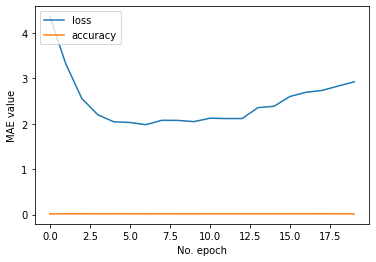

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#### Save models and weigths on disk

In [7]:
sepconv_mod.save("/tmp/sepconvnn")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/sepconvnn/assets


#### Inference on one sample star

In [8]:
for row in df.take(1):
    print("Batch shape (%s %s)" % (row[0].shape, row[1].shape))
    # Select first row on the batch
    X_star_test = row[0][0].numpy()
    y_star_test = row[1][0].numpy()

y_hats = sepconv_mod.predict_classes(X_star_test.reshape(1, 406, 3))
print("\nInference: Y_hat=%s | Y_test=%s" % (y_hats, np.where(y_star_test[0]==1)[0]))

Batch shape ((150, 406, 3) (150, 1, 100))

Inference: Y_hat=[25] | Y_test=[51]
